In [1]:
import numpy as np 
import pandas as pd 

In [2]:
data = pd.read_csv('Churn_Modelling.csv')

In [3]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [4]:
data.drop('RowNumber' , axis = 'columns' , inplace=True)
data.drop('CustomerId' , axis = 'columns' , inplace=True)
data.drop('Surname' , axis = 'columns' , inplace=True)

In [5]:
data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
data = pd.get_dummies(data = data , columns = ['Geography'])
data.dtypes

CreditScore            int64
Gender                object
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France        bool
Geography_Germany       bool
Geography_Spain         bool
dtype: object

In [7]:
data.replace({True : 1 , False : 0} , inplace=True)
data.dtypes

CreditScore            int64
Gender                object
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       int64
Geography_Germany      int64
Geography_Spain        int64
dtype: object

In [8]:
data['Gender'].replace({'Male' : 1 , 'Female' : 0} , inplace=True)
data.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       int64
Geography_Germany      int64
Geography_Spain        int64
dtype: object

In [9]:
data.sample(3)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
2297,709,0,40,9,131569.63,1,1,1,103970.58,0,1,0,0
6568,724,1,54,8,172192.49,1,1,1,136902.01,0,0,1,0
7220,718,1,40,9,0.00,2,0,0,121537.91,0,0,0,1


In [10]:
cols_to_scale = ['CreditScore' , 'Age' , 'Tenure' , 'Balance' , 'NumOfProducts' , 'EstimatedSalary']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])

In [11]:
data.dtypes

CreditScore          float64
Gender                 int64
Age                  float64
Tenure               float64
Balance              float64
NumOfProducts        float64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       int64
Geography_Germany      int64
Geography_Spain        int64
dtype: object

In [12]:
x = data.drop('Exited' , axis='columns')
y = data['Exited']

print(x.shape , y.shape)

(10000, 12) (10000,)


In [13]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.1)
print(x_test.shape , y_test.shape)
print(y_test.value_counts())
print(x_train.dtypes)

(1000, 12) (1000,)
Exited
0    812
1    188
Name: count, dtype: int64
CreditScore          float64
Gender                 int64
Age                  float64
Tenure               float64
Balance              float64
NumOfProducts        float64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Geography_France       int64
Geography_Germany      int64
Geography_Spain        int64
dtype: object


In [14]:
import tensorflow as tf 
from tensorflow import keras 

neuralNetwork = keras.Sequential([
    keras.layers.Dense(120 , input_shape=(12,) , activation='relu'),
    keras.layers.Dense(50 , activation='relu'),
    keras.layers.Dense(20 , activation='relu'),
    keras.layers.Dense(10 , activation='relu'),
    keras.layers.Dense(5 , activation='relu'),
    keras.layers.Dense(1 , activation='sigmoid')    
])

neuralNetwork.compile(
    optimizer='adam',
    loss = 'mean_squared_error',
    metrics=['accuracy']
)

neuralNetwork.fit(x_train , y_train , epochs = 10)

Epoch 1/10
282/282 [==============================] - 2s 2ms/step - loss: 0.1522 - accuracy: 0.8022
Epoch 2/10
282/282 [==============================] - 1s 3ms/step - loss: 0.1325 - accuracy: 0.8259
Epoch 3/10
282/282 [==============================] - 1s 3ms/step - loss: 0.1217 - accuracy: 0.8419
Epoch 4/10
282/282 [==============================] - 1s 3ms/step - loss: 0.1131 - accuracy: 0.8527
Epoch 5/10
282/282 [==============================] - 1s 3ms/step - loss: 0.1089 - accuracy: 0.8560
Epoch 6/10
282/282 [==============================] - 1s 3ms/step - loss: 0.1092 - accuracy: 0.8550
Epoch 7/10
282/282 [==============================] - 1s 4ms/step - loss: 0.1073 - accuracy: 0.8568
Epoch 8/10
282/282 [==============================] - 1s 4ms/step - loss: 0.1054 - accuracy: 0.8593
Epoch 9/10
282/282 [==============================] - 1s 4ms/step - loss: 0.1055 - accuracy: 0.8573
Epoch 10/10
282/282 [==============================] - 3s 11ms/step - loss: 0.1036 - accuracy: 0.863

In [15]:
neuralNetwork.evaluate(x_test , y_test)
y_prediction = np.round(neuralNetwork.predict(x_test))
from sklearn.metrics import classification_report
print(classification_report(y_prediction , y_test))

#Prediction that the customer wont leave is done with high f1score , prediction about leaving is prety dicey

32/32 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

         0.0       0.98      0.87      0.92       921
         1.0       0.35      0.84      0.49        79

    accuracy                           0.86      1000
   macro avg       0.67      0.85      0.71      1000
weighted avg       0.93      0.86      0.89      1000



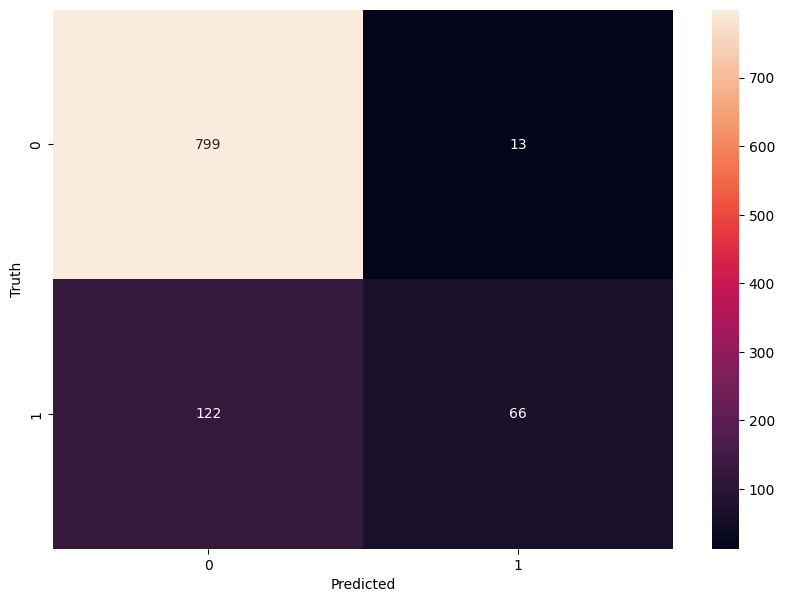

In [16]:
import seaborn as sn
import matplotlib.pyplot as plt
cm = tf.math.confusion_matrix(labels = y_test , predictions = y_prediction)
plt.figure(figsize=(10,7))
sn.heatmap(cm , annot = True , fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [17]:
y_test.value_counts()

Exited
0    812
1    188
Name: count, dtype: int64

In [18]:
#### Equal number of both classifications 
data.dtypes


CreditScore          float64
Gender                 int64
Age                  float64
Tenure               float64
Balance              float64
NumOfProducts        float64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       int64
Geography_Germany      int64
Geography_Spain        int64
dtype: object

In [19]:
data_0 = data[data['Exited'] == 0]
data_1 = data[data['Exited'] == 1]
count_class_0 , count_class_1 = data.Exited.value_counts()
data_0.shape , data_1.shape

((7963, 13), (2037, 13))

In [20]:
data_0_under = data_0.sample(count_class_1)
data_0_full = pd.concat([data_1 , data_0_under] , axis = 0)
print(data_0_full.Exited.value_counts())

Exited
1    2037
0    2037
Name: count, dtype: int64


In [21]:
ux = data_0_full.drop('Exited' , axis = 'columns')
uy = data_0_full['Exited']

In [22]:
ux_train , ux_test , uy_train , uy_test = train_test_split(ux , uy , test_size = 0.2 , random_state=15 , stratify=uy)
uy_train.value_counts()

Exited
1    1630
0    1629
Name: count, dtype: int64

In [23]:
neuralNetwork.fit(ux_train , uy_train , epochs = 50)

Epoch 1/50
 29/102 [=======>......................] - ETA: 0s - loss: 0.1803 - accuracy: 0.7328

102/102 [==============================] - 0s 2ms/step - loss: 0.1644 - accuracy: 0.7622
Epoch 2/50
102/102 [==============================] - 0s 1ms/step - loss: 0.1555 - accuracy: 0.7708
Epoch 3/50
102/102 [==============================] - 0s 2ms/step - loss: 0.1507 - accuracy: 0.7763
Epoch 4/50
102/102 [==============================] - 0s 1ms/step - loss: 0.1503 - accuracy: 0.7791
Epoch 5/50
102/102 [==============================] - 0s 2ms/step - loss: 0.1477 - accuracy: 0.7867
Epoch 6/50
102/102 [==============================] - 0s 1ms/step - loss: 0.1455 - accuracy: 0.7898
Epoch 7/50
102/102 [==============================] - 0s 1ms/step - loss: 0.1456 - accuracy: 0.7907
Epoch 8/50
102/102 [==============================] - 0s 1ms/step - loss: 0.1442 - accuracy: 0.7938
Epoch 9/50
102/102 [==============================] - 0s 1ms/step - loss: 0.1428 - accuracy: 0.7947
Epoch 10/50
102/102 [==============================] - 0s 1ms/step - loss: 0.1409 - accuracy: 0.7972
Epoch 11/5

In [24]:
neuralNetwork.evaluate(ux_test , uy_test)
uy_prediction = np.round(neuralNetwork.predict(ux_test))
from sklearn.metrics import classification_report
print(classification_report(uy_prediction , uy_test))
### here f1_score went equal for majority and minority class 

26/26 [==============================] - 0s 960us/step
              precision    recall  f1-score   support

         0.0       0.74      0.73      0.74       415
         1.0       0.72      0.74      0.73       400

    accuracy                           0.73       815
   macro avg       0.73      0.73      0.73       815
weighted avg       0.73      0.73      0.73       815



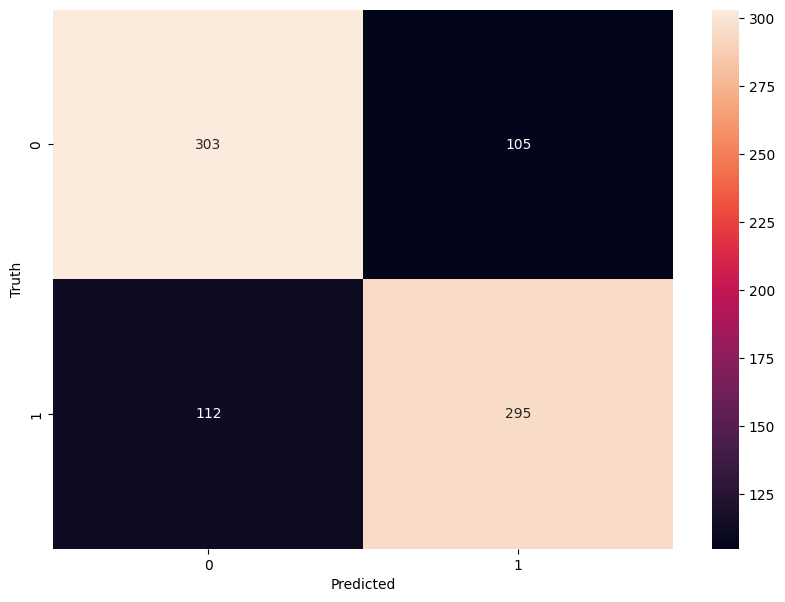

In [25]:
cm = tf.math.confusion_matrix(labels = uy_test , predictions = uy_prediction)
plt.figure(figsize=(10,7))
sn.heatmap(cm , annot = True , fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [26]:
#### OVERSAMPLING

In [27]:
count_class_0 , count_class_1
data_1_over = data_1.sample(count_class_0 , replace = True)
data_1_over.shape

(7963, 13)

In [28]:
data_over = pd.concat([data_0 , data_1_over], axis = 0)
oy = data['Exited']
ox = data.drop('Exited' , axis='columns')

In [29]:
ox_train , ox_test , oy_train , oy_test = train_test_split(ox , oy , test_size=0.2 , random_state=5 , stratify=oy)
neuralNetwork.fit(ox_train , oy_train , epochs=50)



Epoch 1/50
250/250 [==============================] - 0s 2ms/step - loss: 0.1058 - accuracy: 0.8569
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 0.1000 - accuracy: 0.8654
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0961 - accuracy: 0.8711
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0961 - accuracy: 0.8692
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0952 - accuracy: 0.8705
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0939 - accuracy: 0.8770
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0937 - accuracy: 0.8744
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0926 - accuracy: 0.8745
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0916 - accuracy: 0.8761
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0910 - accuracy: 0.8800

In [30]:

neuralNetwork.evaluate(ox_test , oy_test)
oy_prediction = np.round(neuralNetwork.predict(ox_test))
from sklearn.metrics import classification_report
print(classification_report(oy_prediction , oy_test))

63/63 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

         0.0       0.92      0.88      0.90      1660
         1.0       0.53      0.64      0.58       340

    accuracy                           0.84      2000
   macro avg       0.73      0.76      0.74      2000
weighted avg       0.86      0.84      0.85      2000



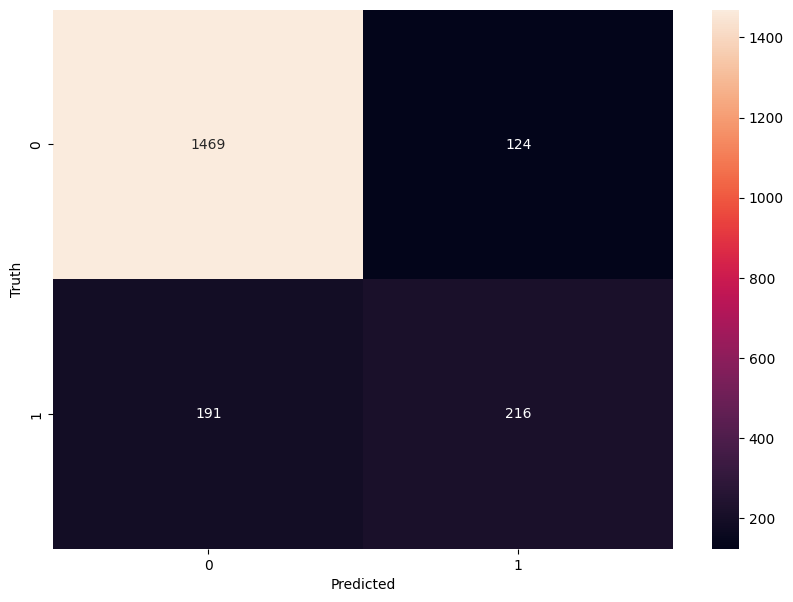

In [31]:

cm = tf.math.confusion_matrix(labels = oy_test , predictions = oy_prediction)
plt.figure(figsize=(10,7))
sn.heatmap(cm , annot = True , fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [32]:
######SMOTE

In [33]:
x = data.drop('Exited' , axis='columns')
y = data['Exited']
x.shape , y.shape

((10000, 12), (10000,))

In [50]:
from imblearn.over_sampling import SMOTE 
smote = SMOTE(sampling_strategy='minority')
x_sm , y_sm = smote.fit_resample(x ,y)
y_sm.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [58]:
sx_train , sx_test , sy_train , sy_test = train_test_split(x_sm , y_sm , test_size=0.2 , random_state=5 , stratify=y_sm)
neuralNetwork.fit(sx_train , sy_train , epochs=50)

Epoch 1/50
399/399 [==============================] - 0s 1ms/step - loss: 0.1165 - accuracy: 0.8386
Epoch 2/50
399/399 [==============================] - 0s 1ms/step - loss: 0.1073 - accuracy: 0.8487
Epoch 3/50
399/399 [==============================] - 1s 1ms/step - loss: 0.1032 - accuracy: 0.8577
Epoch 4/50
399/399 [==============================] - 1s 1ms/step - loss: 0.1007 - accuracy: 0.8605
Epoch 5/50
399/399 [==============================] - 1s 1ms/step - loss: 0.0979 - accuracy: 0.8666
Epoch 6/50
399/399 [==============================] - 1s 1ms/step - loss: 0.0947 - accuracy: 0.8715
Epoch 7/50
399/399 [==============================] - 1s 1ms/step - loss: 0.0938 - accuracy: 0.8728
Epoch 8/50
399/399 [==============================] - 1s 1ms/step - loss: 0.0930 - accuracy: 0.8753
Epoch 9/50
399/399 [==============================] - 1s 1ms/step - loss: 0.0894 - accuracy: 0.8787
Epoch 10/50
399/399 [==============================] - 0s 1ms/step - loss: 0.0889 - accuracy: 0.8816

In [59]:
neuralNetwork.evaluate(sx_test , sy_test)
sy_prediction = np.round(neuralNetwork.predict(sx_test))
from sklearn.metrics import classification_report
print(classification_report(sy_prediction , sy_test))

100/100 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

         0.0       0.86      0.87      0.87      1565
         1.0       0.88      0.86      0.87      1621

    accuracy                           0.87      3186
   macro avg       0.87      0.87      0.87      3186
weighted avg       0.87      0.87      0.87      3186



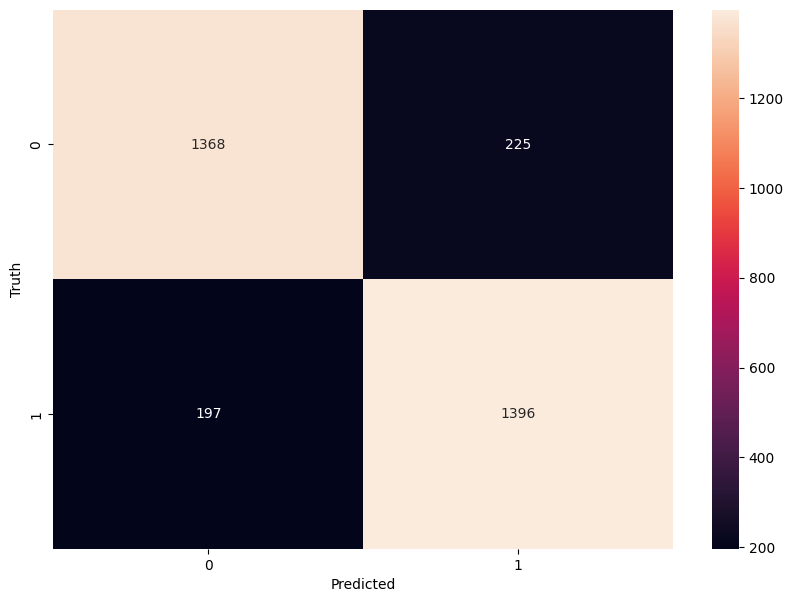

In [60]:

cm = tf.math.confusion_matrix(labels = sy_test , predictions = sy_prediction)
plt.figure(figsize=(10,7))
sn.heatmap(cm , annot = True , fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [61]:
####Ensemble with undersampling

In [71]:
#0 is major class
y.value_counts()
7963/4

1990.75

In [73]:
data_0 = data[data['Exited'] == 0]
data_1 = data[data['Exited'] == 1]

In [79]:
data_e1 = pd.concat([data[:1991] , data_1])
e1x = data_e1.drop('Exited' , axis = 'columns')
e1y = data_e1['Exited']
e1x_train , e1x_test , e1y_train , e1y_test = train_test_split(e1x , e1y , test_size=0.2 , random_state= 10,stratify=e1y)
e1x_train.shape , e1y_train.shape

((3222, 12), (3222,))

In [84]:
data_e2 = pd.concat([data[1991:1991*2] , data_1])
e2x = data_e2.drop('Exited' , axis = 'columns')
e2y = data_e2['Exited']
e2x_train , e2x_test , e2y_train , e2y_test = train_test_split(e2x , e2y , test_size=0.2 , random_state= 10,stratify=e2y)
e2x_train.shape , e2y_train.shape

((3222, 12), (3222,))

In [88]:
data_e3 = pd.concat([data[len(data_1)-1992:len(data_1)-1] , data_1])
e3x = data_e3.drop('Exited' , axis = 'columns')
e3y = data_e1['Exited']
e3x_train , e3x_test , e3y_train , e3y_test = train_test_split(e3x , e3y , test_size=0.2 , random_state= 10,stratify=e3y)
e3x_train.shape , e3y_train.shape

((3222, 12), (3222,))

In [90]:
neuralNetwork.fit(e1x_train , e1y_train , epochs = 50)
neuralNetwork.fit(e2x_train , e3y_train , epochs = 50)
neuralNetwork.fit(e3x_train , e3y_train , epochs = 50)

Epoch 1/50
101/101 [==============================] - 0s 1ms/step - loss: 0.0980 - accuracy: 0.8805
Epoch 2/50
101/101 [==============================] - 0s 2ms/step - loss: 0.0823 - accuracy: 0.8998
Epoch 3/50
101/101 [==============================] - 0s 3ms/step - loss: 0.0641 - accuracy: 0.9249
Epoch 4/50
101/101 [==============================] - 0s 2ms/step - loss: 0.0606 - accuracy: 0.9255
Epoch 5/50
101/101 [==============================] - 0s 2ms/step - loss: 0.0535 - accuracy: 0.9395
Epoch 6/50
101/101 [==============================] - 0s 2ms/step - loss: 0.0485 - accuracy: 0.9448
Epoch 7/50
101/101 [==============================] - 0s 1ms/step - loss: 0.0442 - accuracy: 0.9507
Epoch 8/50
101/101 [==============================] - 0s 1ms/step - loss: 0.0369 - accuracy: 0.9606
Epoch 9/50
101/101 [==============================] - 0s 1ms/step - loss: 0.0367 - accuracy: 0.9606
Epoch 10/50
101/101 [==============================] - 0s 1ms/step - loss: 0.0407 - accuracy: 0.9541

In [91]:
neuralNetwork.evaluate(e1x_test , e2y_test)
e1y_prediction = np.round(neuralNetwork.predict(e1x_test))
from sklearn.metrics import classification_report
print(classification_report(e1y_prediction , e1y_test))

26/26 [==============================] - 0s 960us/step
              precision    recall  f1-score   support

         0.0       0.74      0.71      0.73       326
         1.0       0.81      0.83      0.82       480

    accuracy                           0.78       806
   macro avg       0.77      0.77      0.77       806
weighted avg       0.78      0.78      0.78       806

